In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

import obspy
from obspy.signal.detrend import polynomial
from scipy.signal import find_peaks

In [2]:
sampling_rate = 2000
event_size = 36
start_time = 8 # Video Start Time
user_time = [12, 16] # First event appearance time for each user

# Event Index #

event = np.zeros(event_size)

for i in range(event_size) :
    if(i==0) : 
        event[i] = 9
    else :
        event[i] = event[i-1] + 16

event = event.astype(np.int) # type conversion : floating -> integer
print("* Data Event *")
print(event)


pleasant = [2,4,7,10,13,17,19,22,26,28,31,36]
unpleasant = [3,6,8,12,15,18,20,23,25,29,33,35]
neutral = [1,5,9,11,14,16,21,24,27,30,32,34]


video_index = []

for i in range(1,event_size+1) :
    if i in neutral :
        video_index.append(0) # neutral index = 0
    elif i in pleasant : 
        video_index.append(1) # pleasant index = 1
    elif i in unpleasant :
        video_index.append(2) # unpleasant index = 2

print("\n* Video Event by emotion *")
print(video_index)

* Data Event *
[  9  25  41  57  73  89 105 121 137 153 169 185 201 217 233 249 265 281
 297 313 329 345 361 377 393 409 425 441 457 473 489 505 521 537 553 569]

* Video Event by emotion *
[0, 1, 2, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 2, 1, 0, 1, 2, 0, 1, 0, 2, 0, 2, 1]


*User 1*
1177880
1177381


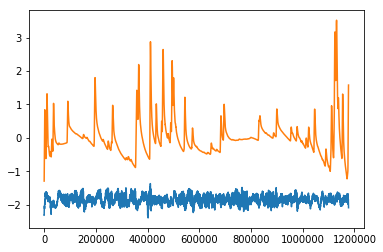



*User 2*


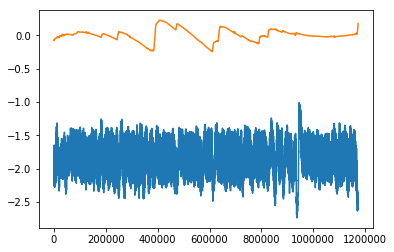

In [3]:
# Read data #

# User 1 #
print("*User 1*")
user1 = pd.read_csv('data1.txt', sep = '	',header=None,names = ['HeartR', 'GSR', 'NAN'])
user1 = user1.drop('NAN', axis=1)
user1 = user1[sampling_rate * (user_time[0]-event[0]):]
print(len(user1))
user1['GSR'] = polynomial(user1['GSR'], order=5, plot=False) # Dtrend

# User 1 - Moving Average Filter 적용 #
user1 = user1.rolling(window=500).mean()
user1 = user1.dropna()
user1 = user1.values

print(len(user1))

# Plotting
plt.plot(user1)
plt.show()

# User 2 #
print("\n\n*User 2*")
user2 = pd.read_csv('data2.txt', sep = '	',header=None,names = ['HeartR', 'GSR', 'NAN'])
user2 = user2.drop('NAN', axis=1)
user2 = user2[sampling_rate * (user_time[1]-event[0]):]
user2['GSR'] = polynomial(user2['GSR'], order=5, plot=False) # Dtrend

# User 2 - Moving Average Filter 적용 #
user2 = user2.rolling(window=500).mean()
user2 = user2.dropna()
user2 = user2.values

# Plotting
plt.plot(user2)
plt.show()

In [38]:
# User 1 #

vGSR_u1 = [] # videoGSR_user1
vGSR_u1.append([]) # for plesant
vGSR_u1.append([]) # for neutral
vGSR_u1.append([]) # for unplesant

# User 2 #

vGSR_u2 = [] # videoGSR_user2
vGSR_u2.append([]) # for plesant
vGSR_u2.append([]) # for neutral
vGSR_u2.append([]) # for unplesant

In [39]:
# Categorizing and processing by data subject #

# User 1 #
for events,index in zip(event, range(event_size)) :
    # [3 seconds before event ~ When the event occurred] compute average
    avg_GSR = np.mean(user1[sampling_rate*(events-3):sampling_rate*events+1,1])
    
    # [When the event occurred ~ 6 seconds after event] - compute deviations using averaging
    vGSR_u1[video_index[index]].append((user1[sampling_rate*events:sampling_rate*(events+6)+1,1] - avg_GSR).tolist())

# User 2 #
for events,index in zip(event, range(event_size)) :
    # [3 seconds before event ~ When the event occurred] compute average
    avg_GSR = np.mean(user2[sampling_rate*(events-3):sampling_rate*events+1,1])
    
    # [When the event occurred ~ 6 seconds after event] - compute deviations using averaging
    vGSR_u2[video_index[index]].append((user2[sampling_rate*events:sampling_rate*(events+6)+1,1] - avg_GSR).tolist())

In [40]:
# Apply Adaptive Threshold

# Max Sernsor Data for each user
user1MS = np.max(vGSR_u1)
user2MS = np.max(vGSR_u2)
adaptiveT = user1MS / user2MS

print("user1 max sensor data: ",user1MS)
print("user2 max sensor data: ",user2MS)
print("user1, user2 % : ", adaptiveT)

user1 max sensor data:  3.39467216215
user2 max sensor data:  0.182854523715
user1, user2 % :  18.5648792996


In [28]:
# Increase signal of user2 using adaptive threshold

for i in range(len(vGSR_u2)) :
    for j in range(len(vGSR_u2[i])) :
        for m in range (len(vGSR_u2[i][j])) :
            vGSR_u2[i][j][m] = vGSR_u2[i][j][m] * adaptiveT

**************** Neutral ****************

neutral


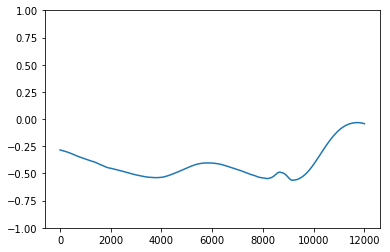



neutral


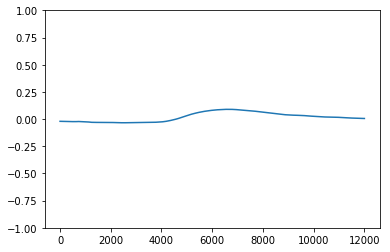



neutral


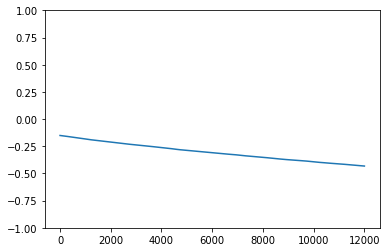



neutral


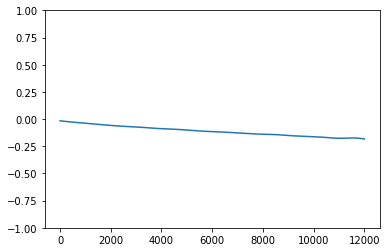



neutral


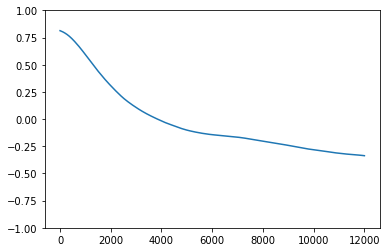



max_peak : 0.323221596739
max_peak_index : 2569
pleasant or unpleasant


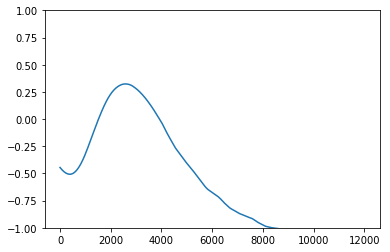



neutral


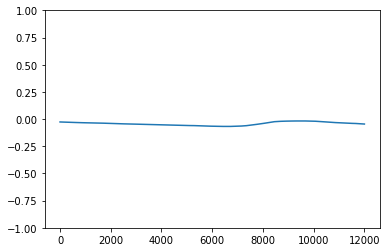



neutral


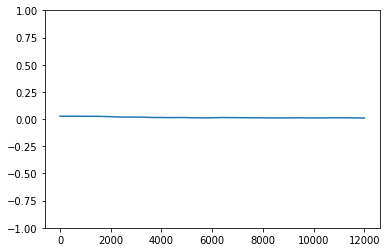



neutral


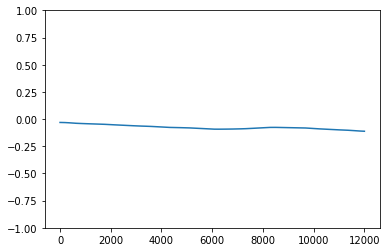



max_peak : 0.340302323187
max_peak_index : 9678
pleasant or unpleasant


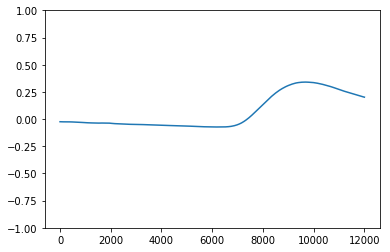



max_peak : 0.244993381784
max_peak_index : 3825
pleasant or unpleasant


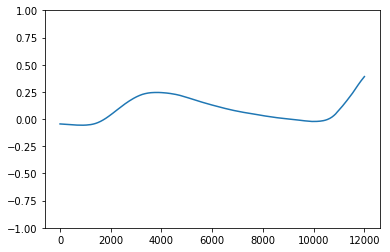



neutral


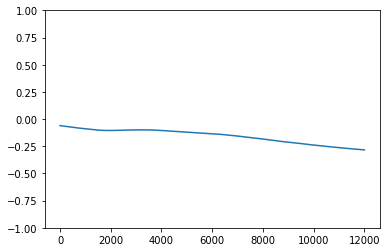



**************** Pleasant ****************

neutral


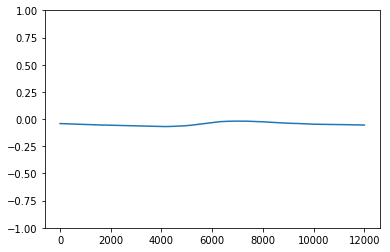



neutral


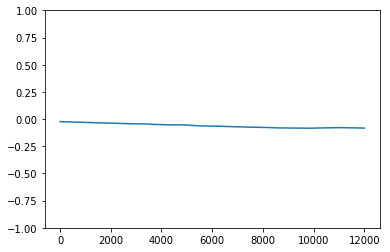



neutral


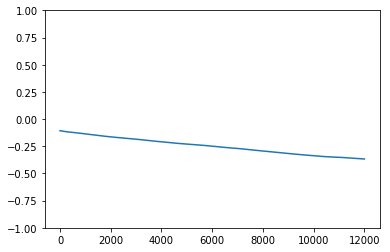



neutral


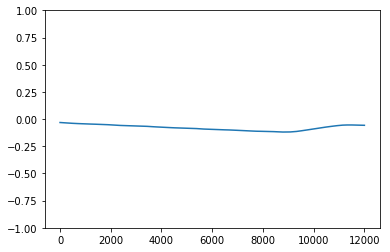



max_peak : 3.39467216215
max_peak_index : 9183
pleasant or unpleasant


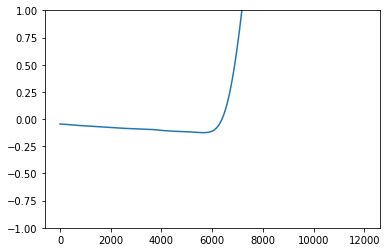



neutral


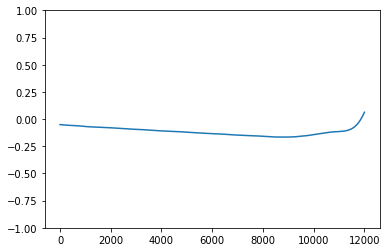



neutral


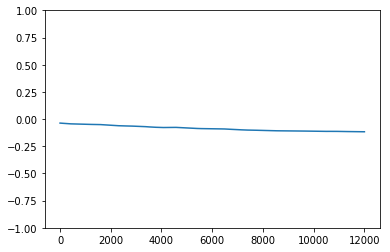



max_peak : 0.764136732096
max_peak_index : 6168
pleasant or unpleasant


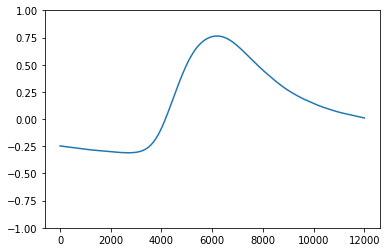



neutral


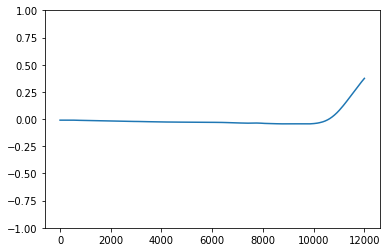



max_peak : 0.134348204622
max_peak_index : 5797
pleasant or unpleasant


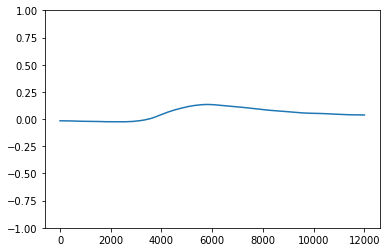



max_peak : 0.329083126535
max_peak_index : 363
pleasant or unpleasant


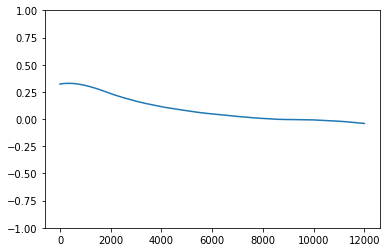



neutral


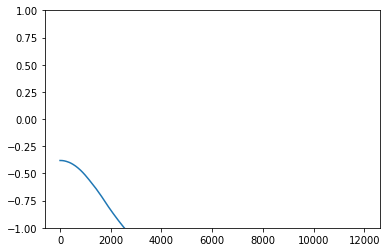



**************** Unpleasant ****************

max_peak : 1.2657420765
max_peak_index : 9608
pleasant or unpleasant


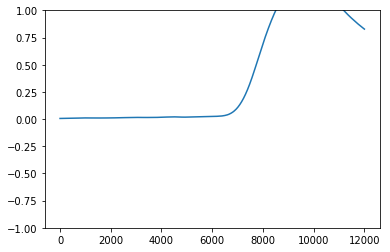



neutral


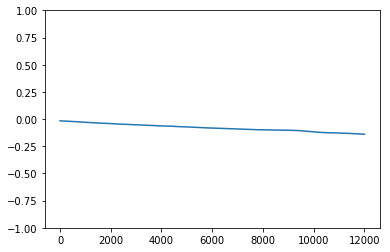



max_peak : 0.159389177318
max_peak_index : 5871
pleasant or unpleasant


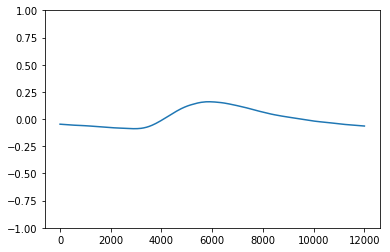



neutral


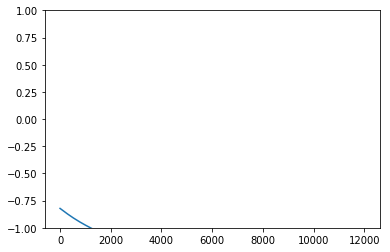



neutral


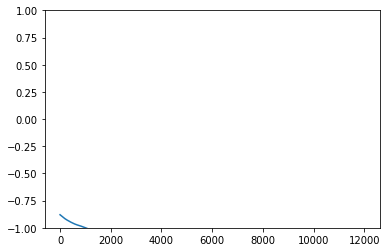



max_peak : 0.506173270816
max_peak_index : 11774
pleasant or unpleasant


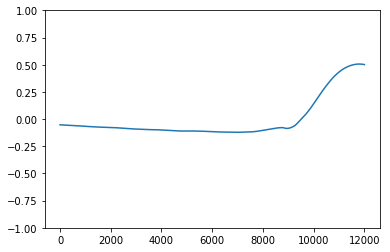



neutral


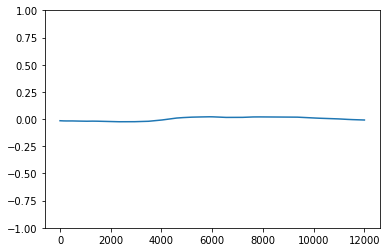



neutral


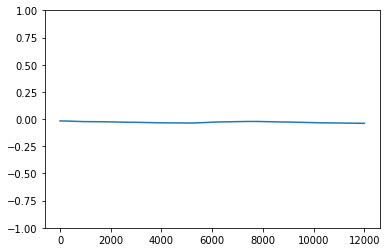



neutral


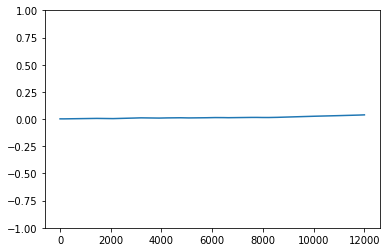



neutral


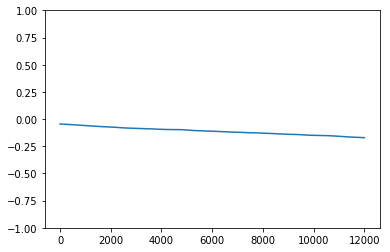



max_peak : 1.20417575746
max_peak_index : 4321
pleasant or unpleasant


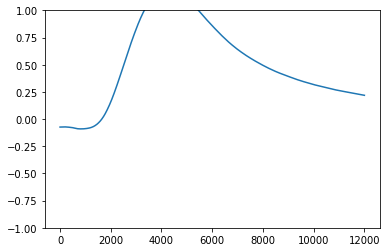



max_peak : 1.8576359786
max_peak_index : 5761
pleasant or unpleasant


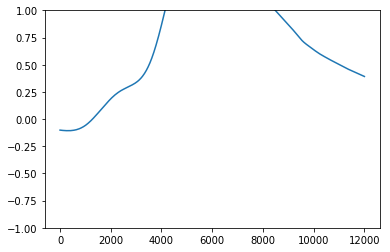



Neutral:  9
Pleasant: 4
Unpleasant: 5


In [41]:
# Find Peak - User 1 #

GSR_result_u1=[]
GSR_result_u1.append([])
GSR_result_u1.append([])
GSR_result_u1.append([])
user1_threshold = 0.1


for i in range(len(vGSR_u1)) :
    if i == 0 : print("**************** Neutral ****************\n")
    elif i == 1 : print("**************** Pleasant ****************\n")
    else : print("**************** Unpleasant ****************\n")
    for j in range(len(vGSR_u1[i])) :
        _peaks, _ = find_peaks(vGSR_u1[i][j], height=user1_threshold)
        
        # Find Max Peak
        if len(_peaks) != 0 : # When there is more than one peak
            peak_value = [] # list for peak's y value
            
            for peak_index in _peaks : 
                peak_value.append(vGSR_u1[i][j][peak_index]) # peak's y value
                
            max_peak = np.max(peak_value)
            max_peak_index = _peaks[peak_value.index(max_peak)]
            print("max_peak :",max_peak)
            print("max_peak_index :", max_peak_index)
            
            # Exclude peak that do not affect to result for better accuracy
            if max_peak_index > 9900 and max_peak_index < 12000 and max_peak < 0.35 :
                _peaks = []              
    
        if(len(_peaks)>=1) : 
            print("pleasant or unpleasant")
            GSR_result_u1[i].append(1)
        else :
            print("neutral")
            GSR_result_u1[i].append(0)
        plt.ylim(-1,1)
        plt.axis(option='auto')
        plt.plot(vGSR_u1[i][j])
        plt.show()
        print("\n")

print("Neutral: ",GSR_result_u1[0].count(0))
print("Pleasant:", GSR_result_u1[1].count(1))
print("Unpleasant:", GSR_result_u1[2].count(1))

**************** Neutral ****************



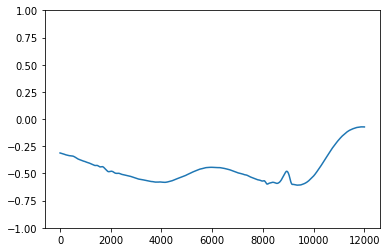

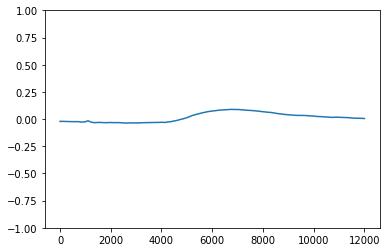

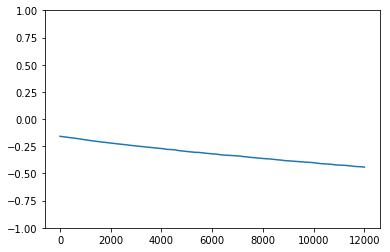

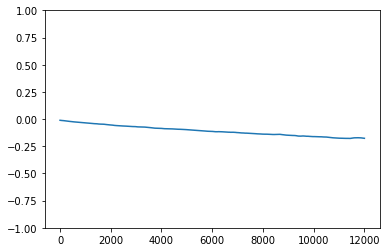

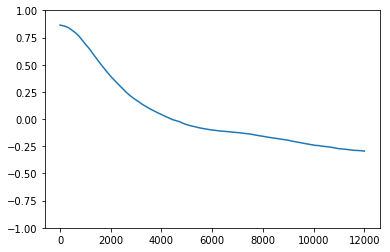

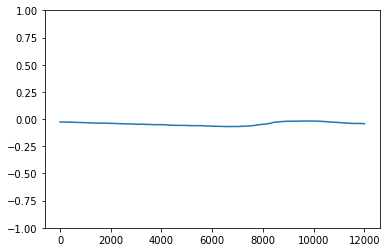

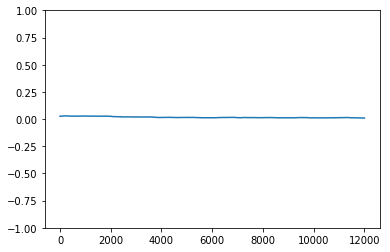

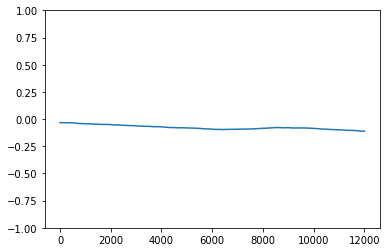

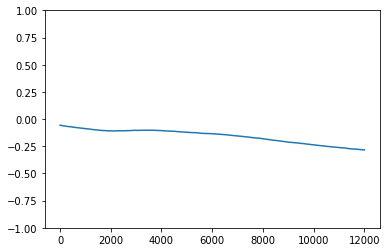




**************** Pleasant ****************



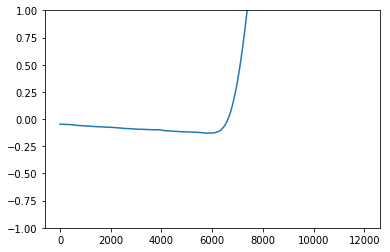

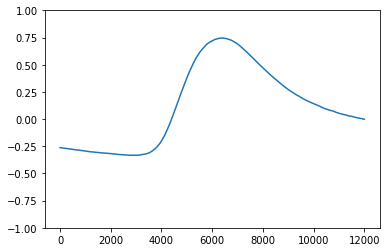

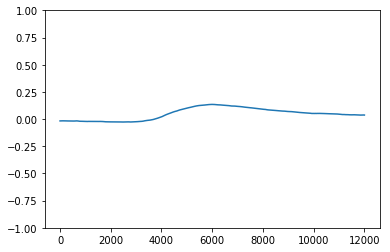

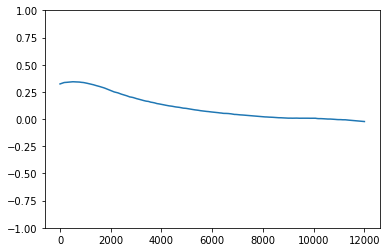




**************** Unpleasant ****************



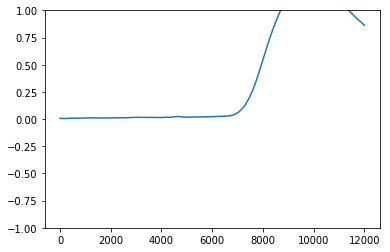

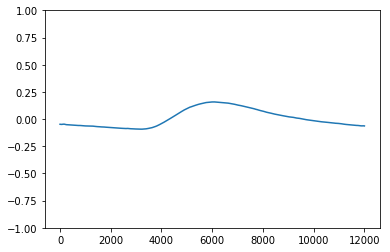

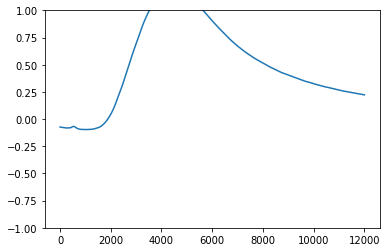

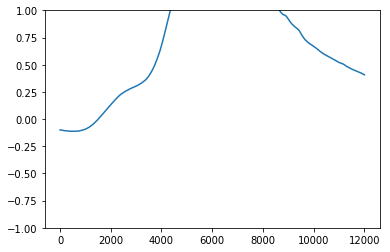

In [68]:
# Correct - User 1 #
# Show graph that have correct result

for i in range(len(GSR_result_u1)) :
    if i == 0 : print("**************** Neutral ****************\n")
    elif i ==1 : print("\n\n\n**************** Pleasant ****************\n")
    else : print("\n\n\n**************** Unpleasant ****************\n")
        
    for j in range(len(GSR_result_u1[i])) :
        if ( i == 0 and GSR_result_u1[i][j] == 0 ) or ( i != 0 and GSR_result_u1[i][j] == 1 ) :
            _peaks, _ = find_peaks(vGSR_u1[i][j], height=0.1)
            
            if len(_peaks) != 0 :
                peak_value = [] 

                for peak_index in _peaks : 
                    peak_value.append(vGSR_u1[i][j][peak_index]) 

                max_peak = np.max(peak_value) 
                max_peak_index = _peaks[peak_value.index(max_peak)]      
                
                if max_peak_index > 9900 and max_peak_index < 12000 and max_peak < 0.35 :
                    print("max_peak :",max_peak)
                    print("max_peak_index :", max_peak_index)  
       
            plt.plot(vGSR_u1[i][j])
            plt.ylim(-1,1)
            plt.show()

**************** Neutral ****************



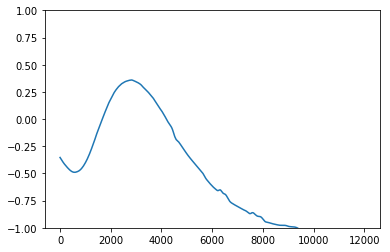

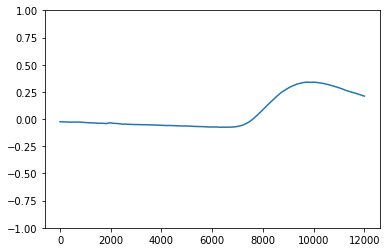

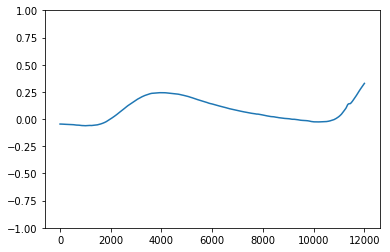




**************** Pleasant ****************



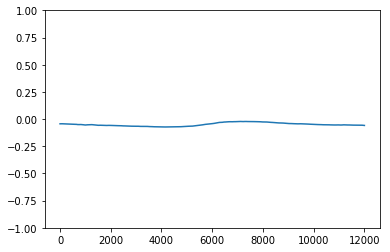

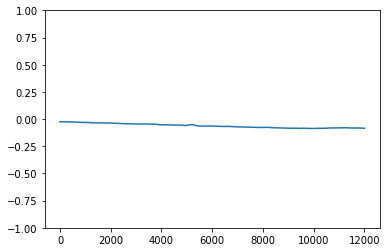

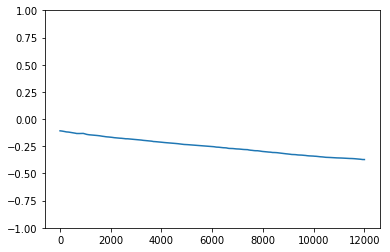

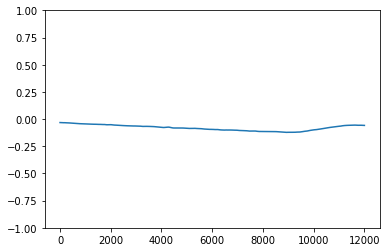

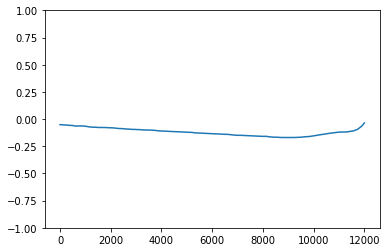

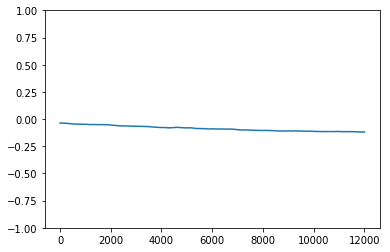

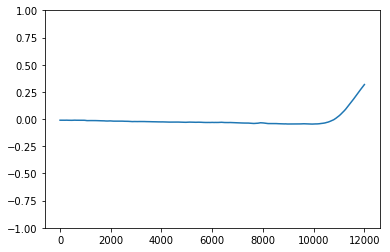

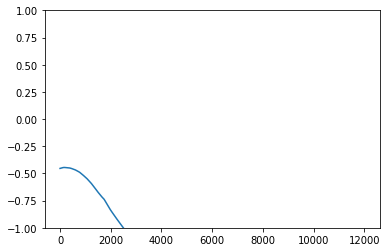




**************** Unpleasant ****************



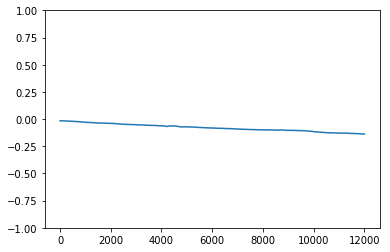

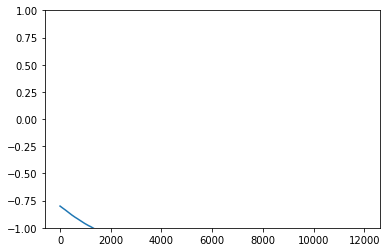

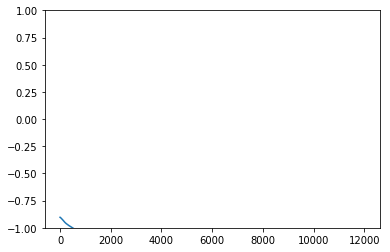

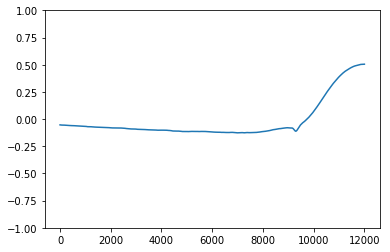

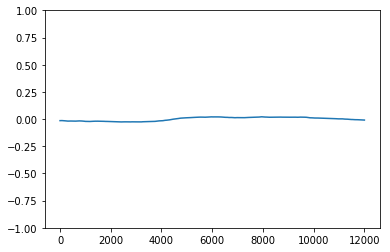

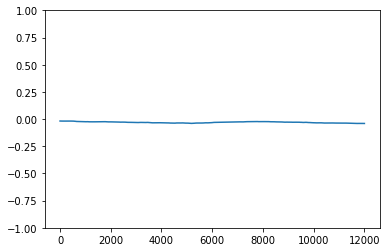

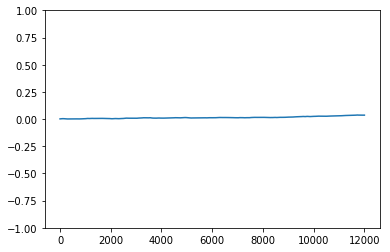

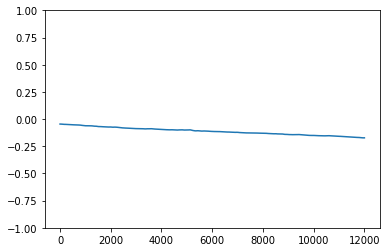

In [69]:
# Wrong - User 1 #
# Show graph that have wrong result

for i in range(len(GSR_result_u1)) :
    if i == 0 : print("**************** Neutral ****************\n")
    elif i ==1 : print("\n\n\n**************** Pleasant ****************\n")
    else : print("\n\n\n**************** Unpleasant ****************\n")
        
    for j in range(len(GSR_result_u1[i])) :
        if ( i == 0 and GSR_result_u1[i][j] != 0 ) or ( i != 0 and GSR_result_u1[i][j] != 1 ) :
            _peaks, _ = find_peaks(vGSR_u1[i][j], height=0.1, distance = sampling_rate)
            
             # Find Max Peak
            if len(_peaks) != 0 :
                peak_value = []

                for peak_index in _peaks :
                    peak_value.append(vGSR_u1[i][j][peak_index])

                max_peak = np.max(peak_value)
                max_peak_index = _peaks[peak_value.index(max_peak)]
                
                if max_peak_index > 9900 and max_peak_index < 12000 and max_peak < 0.35 :
                    print("max_peak :",max_peak)
                    print("max_peak_index :", max_peak_index)  

            plt.plot(vGSR_u1[i][j])
            plt.ylim(-1,1)
            plt.show()

**************** Neutral ****************

max_peak : 0.0247560080534
max_peak_index : 10780
pleasant or unpleasant


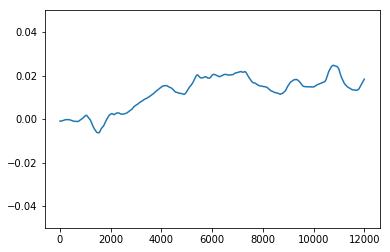



neutral


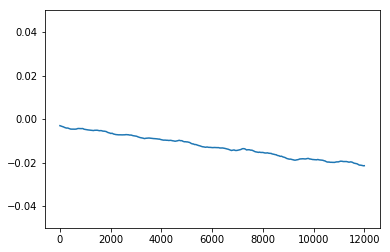



neutral


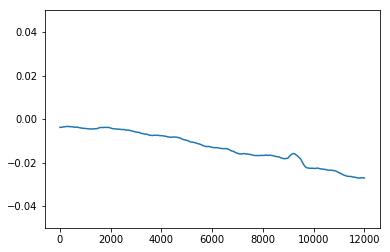



neutral


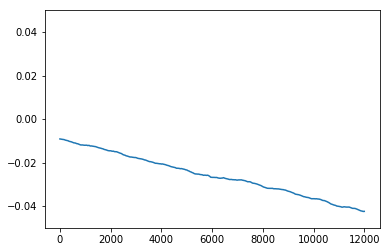



neutral


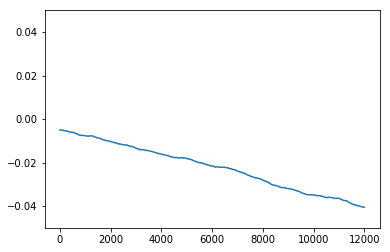



neutral


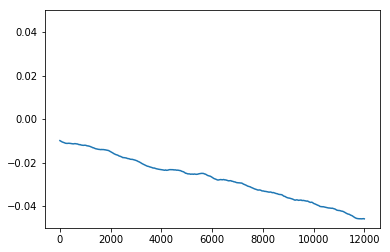



neutral


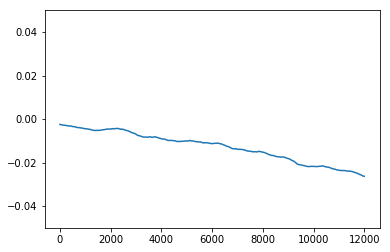



neutral


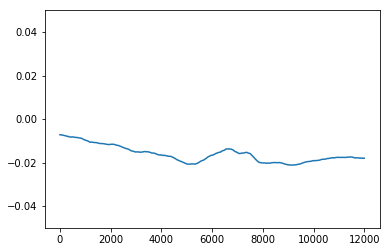



neutral


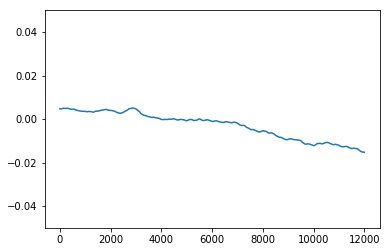



neutral


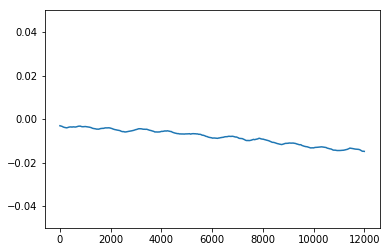



neutral


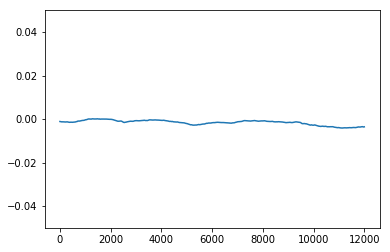



neutral


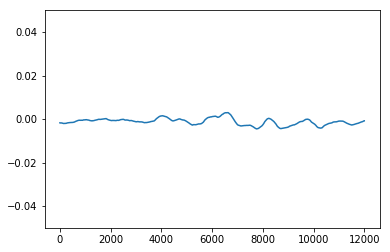



**************** Pleasant ****************

neutral


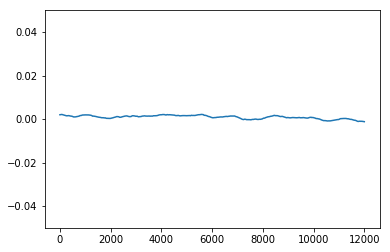



neutral


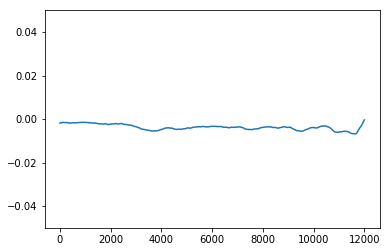



neutral


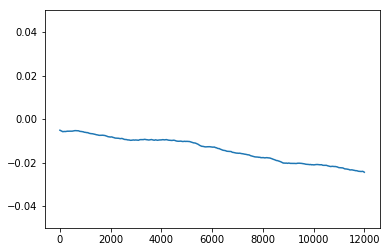



neutral


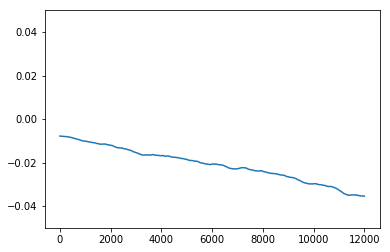



max_peak : 0.0366363643177
max_peak_index : 10773
neutral


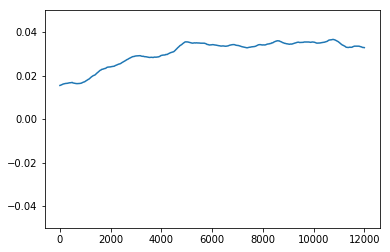



neutral


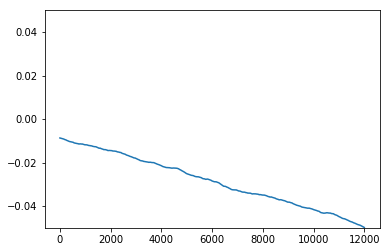



neutral


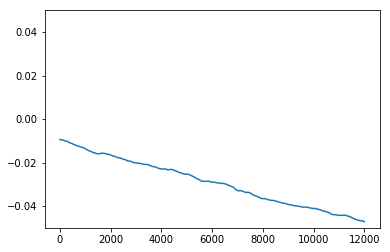



neutral


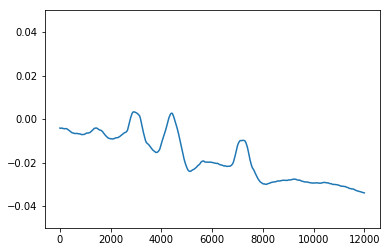



max_peak : 0.0958684064885
max_peak_index : 11417
pleasant or unpleasant


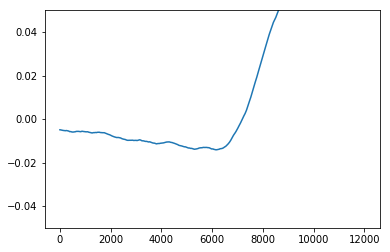



max_peak : 0.019050869543
max_peak_index : 604
pleasant or unpleasant


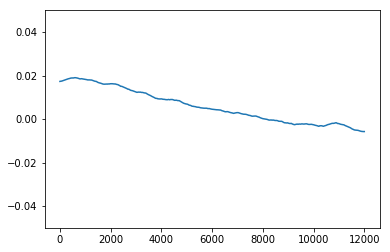



neutral


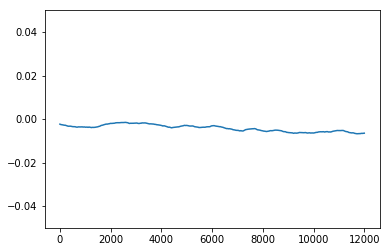



max_peak : 0.0067689654127
max_peak_index : 8772
pleasant or unpleasant


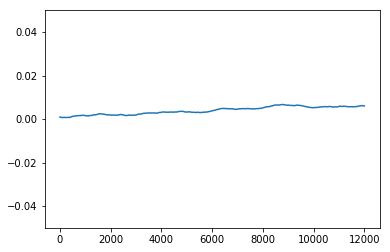



**************** Unpleasant ****************

max_peak : 0.0315590060375
max_peak_index : 11731
pleasant or unpleasant


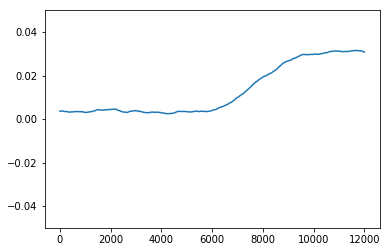



max_peak : 0.0401585230758
max_peak_index : 11360
pleasant or unpleasant


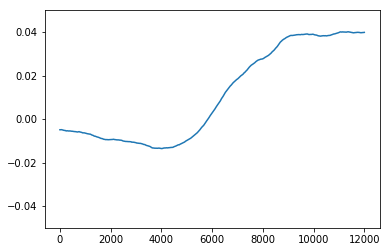



max_peak : 0.111074647238
max_peak_index : 9100
pleasant or unpleasant


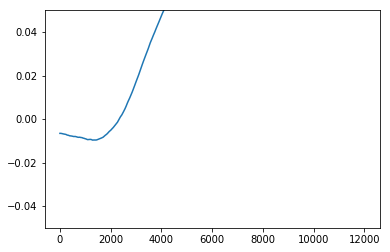



neutral


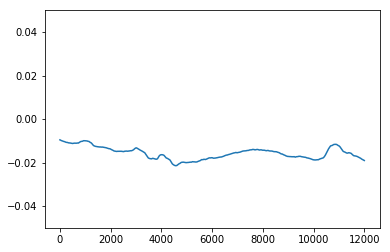



max_peak : 0.0686245871716
max_peak_index : 9586
pleasant or unpleasant


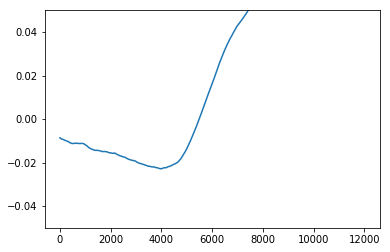



neutral


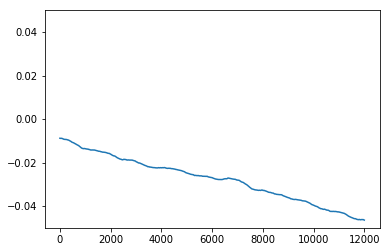



max_peak : 0.0160574470977
max_peak_index : 3761
pleasant or unpleasant


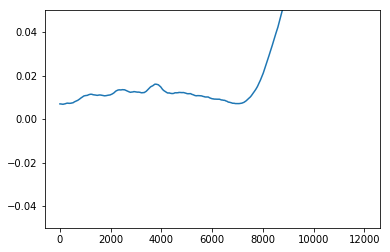



max_peak : 0.00973752374433
max_peak_index : 4128
pleasant or unpleasant


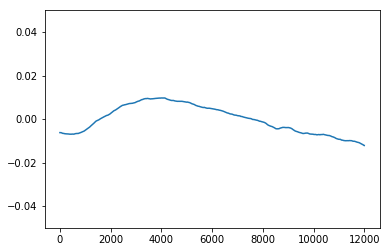



max_peak : 0.102499270066
max_peak_index : 11107
pleasant or unpleasant


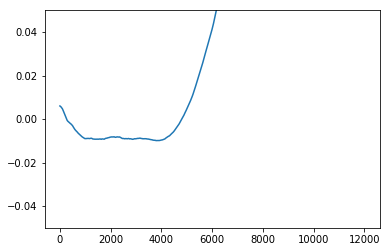



neutral


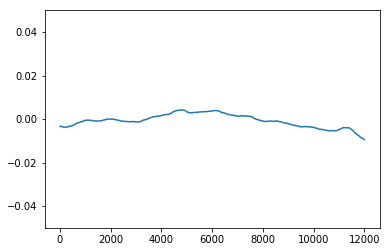



neutral


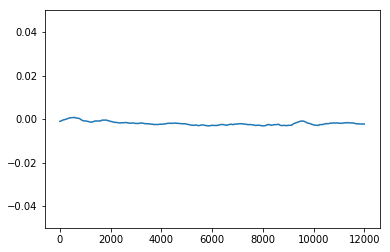



max_peak : 0.00565600894556
max_peak_index : 10824
pleasant or unpleasant


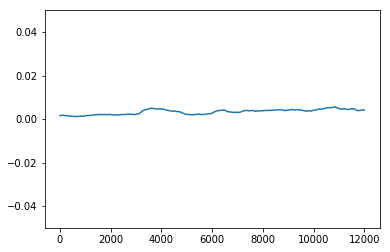



Neutral:  11
Pleasant: 3
Unpleasant: 8
Threshold:  0.1


In [42]:
# Find Peak - User 2 #

GSR_result_u2=[] 
GSR_result_u2.append([])
GSR_result_u2.append([])
GSR_result_u2.append([])
user2_threshold = user1_threshold / adaptiveT # Apply adaptive threshold

for i in range(len(vGSR_u2)) :
    if i == 0 : print("**************** Neutral ****************\n")
    elif i == 1 : print("**************** Pleasant ****************\n")
    else : print("**************** Unpleasant ****************\n")
    for j in range(len(vGSR_u2[i])) :
        _peaks, _ = find_peaks(vGSR_u2[i][j], height=user2_threshold)

        if len(_peaks) != 0 :
            peak_value = [] 
            
            for peak_index in _peaks :
                peak_value.append(vGSR_u2[i][j][peak_index])
                
            max_peak = np.max(peak_value)
            max_peak_index = _peaks[peak_value.index(max_peak)]
            print("max_peak :",max_peak)
            print("max_peak_index :", max_peak_index)
            
            if max_peak_index > 9900 and max_peak_index < 12000 and (max_peak >= 0.036 and max_peak < 0.037) or ( max_peak < 0.35 and max_peak > 0.3) :
                _peaks = []
                
    
        if(len(_peaks)>=1) : 
            print("pleasant or unpleasant")
            GSR_result_u2[i].append(1)
        else :
            print("neutral")
            GSR_result_u2[i].append(0)
        plt.ylim(-0.05,0.05)
        plt.axis(option='auto')
        plt.plot(vGSR_u2[i][j])
        plt.show()
        print("\n")

print("Neutral: ",GSR_result_u2[0].count(0))
print("Pleasant:", GSR_result_u2[1].count(1))
print("Unpleasant:", GSR_result_u2[2].count(1))
print("Threshold: ", user1_threshold)

**************** Neutral ****************



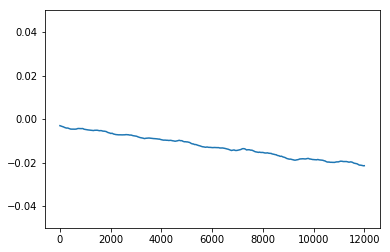

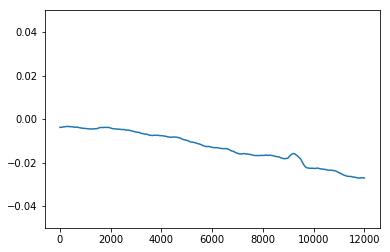

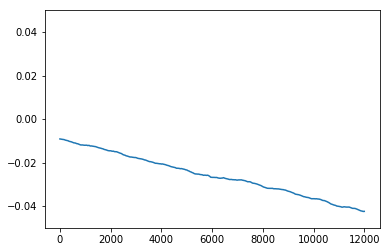

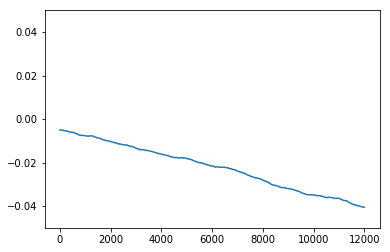

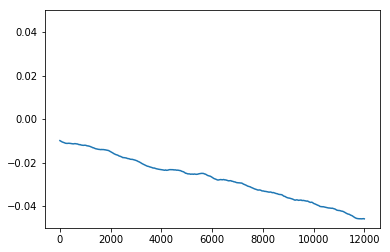

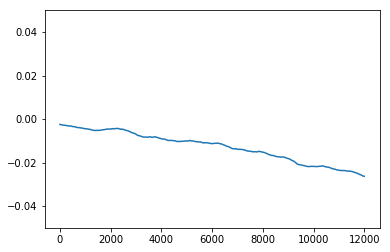

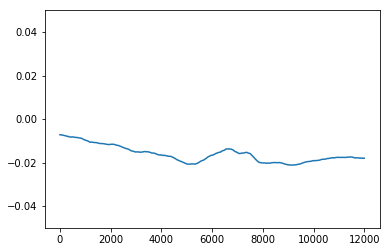

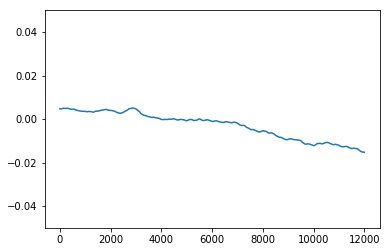

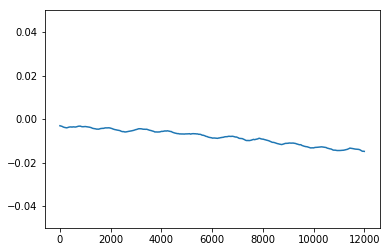

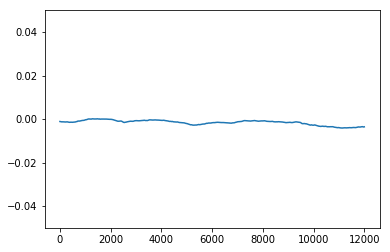

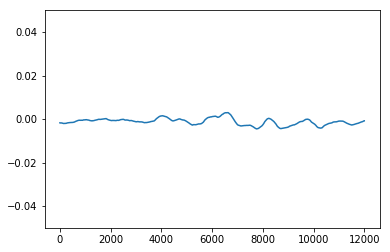




**************** Pleasant ****************

max_peak : 0.0958684064885
max_peak_index : 11417


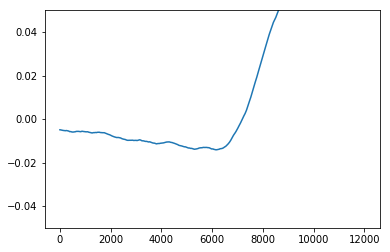

max_peak : 0.019050869543
max_peak_index : 604


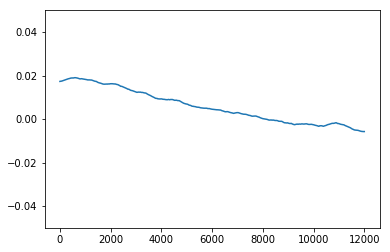

max_peak : 0.0067689654127
max_peak_index : 8772


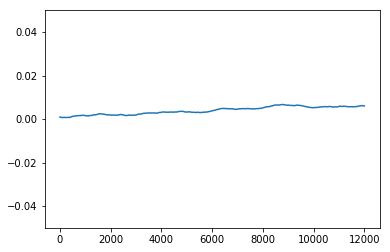




**************** Unpleasant ****************

max_peak : 0.0315590060375
max_peak_index : 11731


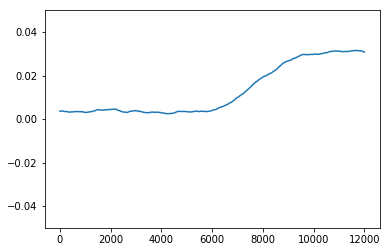

max_peak : 0.0401585230758
max_peak_index : 11360


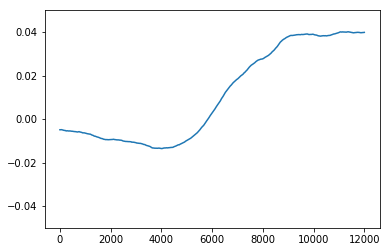

max_peak : 0.111074647238
max_peak_index : 9100


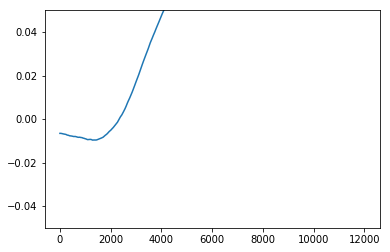

max_peak : 0.0686245871716
max_peak_index : 9586


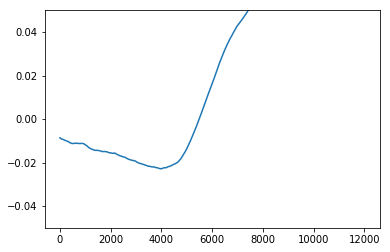

max_peak : 0.0160574470977
max_peak_index : 3761


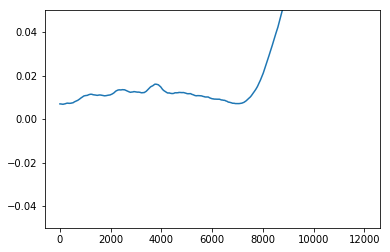

max_peak : 0.00973752374433
max_peak_index : 4128


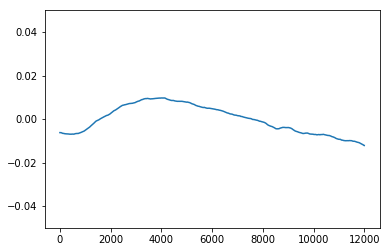

max_peak : 0.102499270066
max_peak_index : 11107


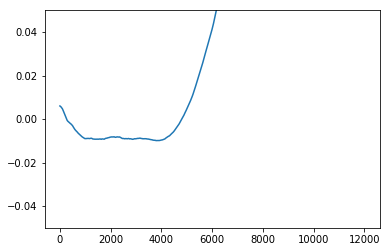

max_peak : 0.00565600894556
max_peak_index : 10824


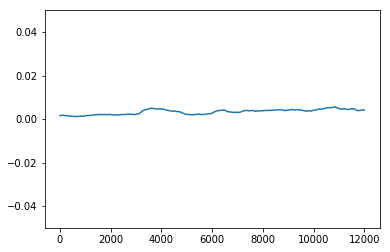

In [114]:
# Correct - User 2 #
# Show graph that have correct result

for i in range(len(GSR_result_u2)) :
    if i == 0 : print("**************** Neutral ****************\n")
    elif i ==1 : print("\n\n\n**************** Pleasant ****************\n")
    else : print("\n\n\n**************** Unpleasant ****************\n")
        
    for j in range(len(GSR_result_u2[i])) :
        if ( i == 0 and GSR_result_u2[i][j] == 0 ) or ( i != 0 and GSR_result_u2[i][j] == 1 ) :
            _peaks, _ = find_peaks(vGSR_u2[i][j], height=user2_threshold)
            
            # Max Peak 찾기
            if len(_peaks) != 0 :
                peak_value = [] 

                for peak_index in _peaks :
                    peak_value.append(vGSR_u2[i][j][peak_index])

                max_peak = np.max(peak_value) 
                max_peak_index = _peaks[peak_value.index(max_peak)]      
                
                print("max_peak :",max_peak)
                print("max_peak_index :", max_peak_index)  

            plt.plot(vGSR_u2[i][j])
            plt.ylim(-0.05,0.05)
            plt.show()

**************** Neutral ****************

max_peak : 0.0247560080534
max_peak_index : 10780


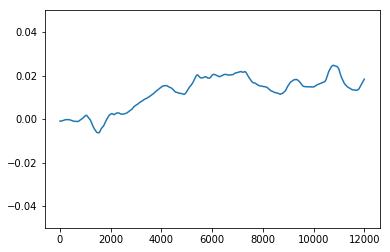




**************** Pleasant ****************



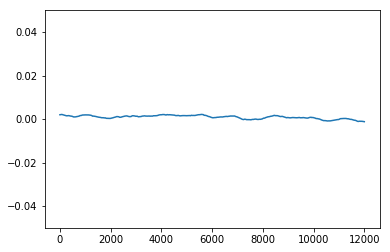

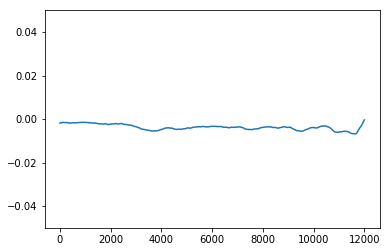

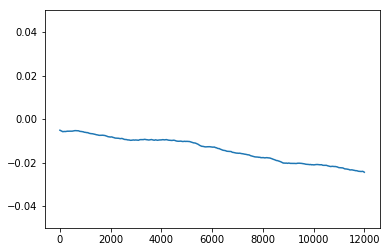

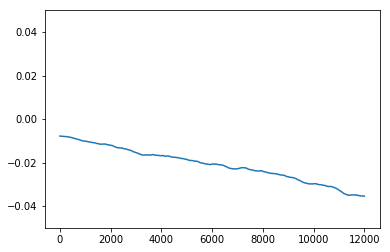

max_peak : 0.0366363643177
max_peak_index : 10773


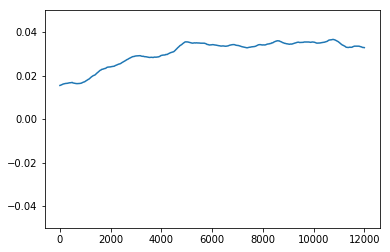

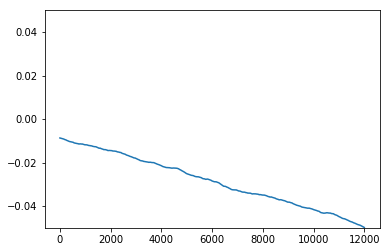

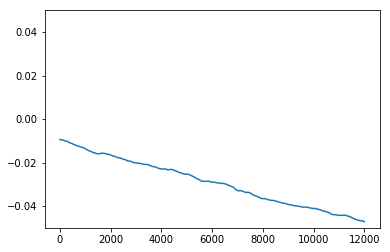

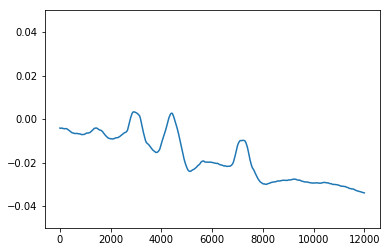

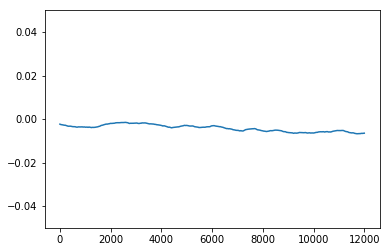




**************** Unpleasant ****************



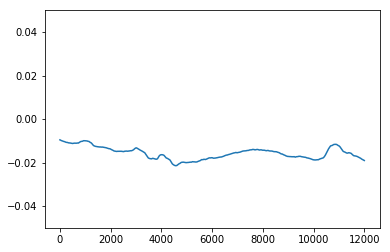

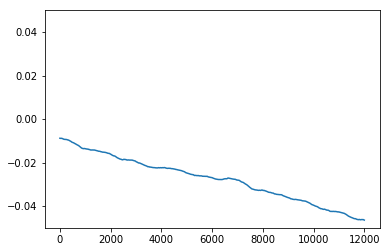

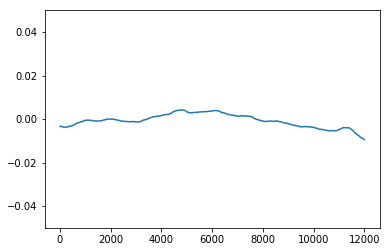

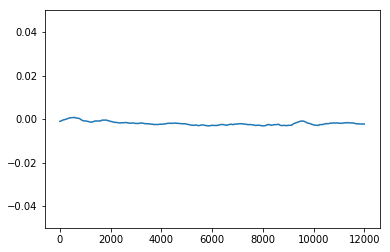

In [115]:
# Wrong - User 2 #
# Show graph that have wrong result

for i in range(len(GSR_result_u2)) :
    if i == 0 : print("**************** Neutral ****************\n")
    elif i ==1 : print("\n\n\n**************** Pleasant ****************\n")
    else : print("\n\n\n**************** Unpleasant ****************\n")
        
    for j in range(len(GSR_result_u2[i])) :
        if ( i == 0 and GSR_result_u2[i][j] != 0 ) or ( i != 0 and GSR_result_u2[i][j] != 1 ) :
            _peaks, _ = find_peaks(vGSR_u2[i][j], height=user2_threshold)
            
             # Max Peak 찾기
            if len(_peaks) != 0 :
                peak_value = []

                for peak_index in _peaks : 
                    peak_value.append(vGSR_u2[i][j][peak_index])

                max_peak = np.max(peak_value)
                max_peak_index = _peaks[peak_value.index(max_peak)]
                
                print("max_peak :",max_peak)
                print("max_peak_index :", max_peak_index)  

            plt.plot(vGSR_u2[i][j])
            plt.ylim(-0.05,0.05)
            plt.show()

* Video Mean Data by emotion *

* neutral *


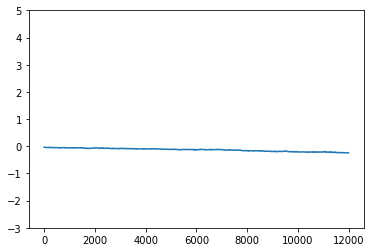

* pleasant *


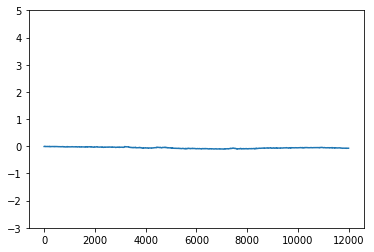

* unpleasant *


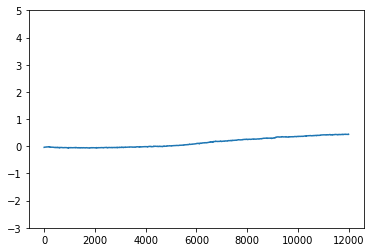

In [15]:
vGSR_m_u1 = [] # videoGSR_mean_user1
vGSR_m_u1.append([]) # for neutral
vGSR_m_u1.append([]) # for plesant
vGSR_m_u1.append([]) # for unplesant

video_emotion = ['neutral', 'pleasant', 'unpleasant']
numGSR = len(vGSR_u1[0][1])

print("* Video Mean Data by emotion *\n")
for i in range(len(vGSR_u1)) :
    for m in range(numGSR) :
        sum = 0
        for j in range(len(vGSR_u1[i])) : # Add column by row
            sum += vGSR_u1[i][j][m]
        vGSR_m_u1[i].append(np.mean(sum))
    print("*",video_emotion[i],"*")
    plt.ylim(-3,5)
    plt.plot(vGSR_m_u1[i])
    plt.show()